# Fraud Detection

Fraud adalah tindakan curang yang dilakukan sedemikian rupa, sehingga menguntungkan diri sendiri, kelompok, atau pihak lain (perorangan, perusahaan atau institusi). Terjadinya suatu fraud disebabkan oleh beberapa alasan dan faktor yang mempengaruhinya. Di dalam dunia pembayaran, transaksi fraud adalah transaksi yang tidak sah atau ilegal. Misalnya adalah transaksi kartu kredit yang tidak diketahui oleh pemilik kartu. Mereka yang melakukan transaksi fraud tersebut biasanya disebut fraudsters, dan menggunakan informasi kartu untuk membeli barang/jasa untuk kepentingan dirinya.


## Deteksi penipuan menggunakan data yang tidak berlabel

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('data/banksim.csv')
df.head()

Unnamed: 0 age gender           category  amount  fraud
0      171915   3      F  es_transportation   49.71      0
1      426989   4      F          es_health   39.29      0
2      310539   3      F  es_transportation   18.76      0
3      215216   4      M  es_transportation   13.95      0
4      569244   2      M  es_transportation   49.87      0

In [ ]:
df.shape

(7200, 6)

In [ ]:
df.groupby('category').mean()

Unnamed: 0      amount     fraud
category                                                  
es_barsandrestaurants  267372.707865   43.841793  0.022472
es_contents            335906.153846   55.170000  0.000000
es_fashion             286952.226804   59.780769  0.020619
es_food                334978.976190   35.216050  0.000000
es_health              335355.176955  126.604704  0.242798
es_home                248312.583333  120.688317  0.208333
es_hotelservices       280138.548387  172.756245  0.548387
es_hyper               244440.712500   46.788180  0.125000
es_leisure             186541.307692  229.757600  1.000000
es_otherservices       241279.000000  149.648960  0.600000
es_sportsandtoys       238775.539474  157.251737  0.657895
es_tech                310473.948718  132.852862  0.179487
es_transportation      295733.881674   27.422014  0.000000
es_travel              338897.777778  231.818656  0.944444
es_wellnessandbeauty   275085.979798   66.167078  0.060606

kita dapat melihat dari rata-rata kategori bahwa penipuan lebih banyak terjadi di kategori ini

### segmentasi kostumer

In [ ]:
df.groupby('age').mean()

Unnamed: 0     amount     fraud
age                                    
0    327520.450000  49.468935  0.050000
1    290985.509116  35.622829  0.026648
2    296867.958851  37.228665  0.028718
3    291471.417346  37.279338  0.023283
4    306041.396403  36.197985  0.035966
5    290885.960859  37.547521  0.023990
6    299193.716561  36.700852  0.022293
U    288372.181818  39.117000  0.000000

In [ ]:
df['age'].value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

kita dapat melihat jumlah rata-rata yang dibelanjakan serta terjadinya penipuan agak mirip di seluruh kelompok. Kelompok usia '0' menonjol tetapi karena hanya ada 40 kasus, tidak masuk akal untuk membaginya dalam kelompok terpisah dan menjalankan model terpisah pada mereka.

### menggunakan statistik untuk mendefinisikan normal fraud

contoh ini memberi Kita gambaran tentang bagaimana transaksi penipuan berbeda secara struktural dari transaksi normal.

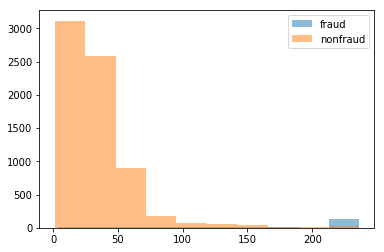

In [ ]:
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend();

karena jumlah pengamatan penipuan jauh lebih kecil, sulit untuk melihat distribusi penuh. Meskipun demikian, kita dapat melihat bahwa transaksi penipuan cenderung berada di sisi yang lebih besar dibandingkan dengan pengamatan normal. Ini kabar baik, karena membantu kita nantinya dalam mendeteksi fraud dari non-fraud.

### Scaling data

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

age gender           category  amount  fraud
0   3      F  es_transportation   49.71      0
1   4      F          es_health   39.29      0
2   3      F  es_transportation   18.76      0
3   4      M  es_transportation   13.95      0
4   2      M  es_transportation   49.87      0

In [ ]:
df.gender.value_counts()

F    3972
M    3212
E      11
U       5
Name: gender, dtype: int64

In [ ]:
df = df.drop(df[(df.gender == "E") | (df.gender == "U")].index)

In [ ]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
gender = le.fit_transform(df.gender)

In [ ]:
df['M'] = pd.get_dummies(df.gender)['M']

In [ ]:
df = pd.concat([df,pd.get_dummies(df.category, drop_first=True)],axis=1)

In [ ]:
y = df.fraud.copy()

In [ ]:
df.drop(['gender', 'fraud', 'category'], axis=1, inplace=True)

In [ ]:
df.head()

age  amount  M  es_contents  es_fashion  es_food  es_health  es_home  \
0   3   49.71  0            0           0        0          0        0   
1   4   39.29  0            0           0        0          1        0   
2   3   18.76  0            0           0        0          0        0   
3   4   13.95  1            0           0        0          0        0   
4   2   49.87  1            0           0        0          0        0   

   es_hotelservices  es_hyper  es_leisure  es_otherservices  es_sportsandtoys  \
0                 0         0           0                 0                 0   
1                 0         0           0                 0                 0   
2                 0         0           0                 0                 0   
3                 0         0           0                 0                 0   
4                 0         0           0                 0                 0   

   es_tech  es_transportation  es_travel  es_wellnessandbeauty  
0        0                  1          0                     0  
1        0                  0          0                     0  
2        0                  1          0                     0  
3        0                  1          0                     0  
4        0                  1          0                     0

In [ ]:
df.shape

(7184, 17)

In [ ]:
y.shape

(7184,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = np.array(df).astype(np.float)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(7184, 17)

### menggunakan metode ``K-means clustering``

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

K Means Clustering memiliki objective yaitu meminimalisasi object function yang telah di atur pada proses clasterisasi. Dengan cara minimalisasi variasi antar 1 cluster dengan maksimalisasi variasi dengan data di cluster lainnya.

K means clustering merupakan metode algoritma dasar,yang diterapkan sebagai berikut

- Menentukan jumlah cluster
- Secara acak mendistribusikan data cluster
- Menghitung rata rata dari data yang ada di cluster.
- Menggunakan langkah baris 3 kembali sesuai nilai treshold
- Menghitung jarak antara data dan nilai centroid(K means clustering)
- Distance space dapat diimplementasikan untuk menghitung jarak data dan centroid. Contoh penghitungan jarak yang sering digunakan adalah manhattan/city blok distance

In [ ]:

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

### menggunakan metode ``Elbow``

menggunakan metode elbow untuk optimisasi K pada kmeans

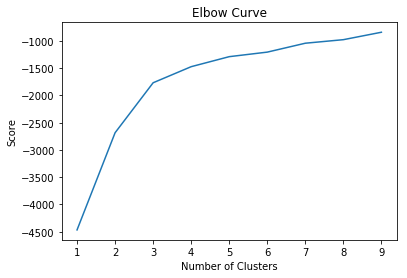

In [ ]:
clustno = range(1, 10)

kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno] 
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

sekarang kita dapat melihat bahwa jumlah cluster yang optimal mungkin harus berada di sekitar 3 cluster, karena di situlah siku berada di kurva.

### deteksi outliers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# pecah data ke dalam training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# definis K-means
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# membuat prediksi fraud berdasarkan dari outliner
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [ ]:
km_y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.unique(km_y_pred)

array([0., 1.])

In [ ]:
X_test_clusters_centers

array([[4.90142696e-01, 1.13272907e-01, 0.00000000e+00, 1.87758167e-04,
        0.00000000e+00, 0.00000000e+00, 9.38790837e-04, 0.00000000e+00,
        0.00000000e+00, 1.87758167e-04, 0.00000000e+00, 0.00000000e+00,
        3.75516335e-04, 3.75516335e-04, 9.97559144e-01, 1.87758167e-04,
        0.00000000e+00],
       [5.04159988e-01, 1.16031693e-01, 1.00000000e+00, 2.28990153e-04,
        1.37394092e-03, 0.00000000e+00, 1.14495077e-03, 4.57980307e-04,
        2.28990153e-04, 9.15960614e-04, 2.28990153e-04, 2.28990153e-04,
        2.28990153e-04, 1.37394092e-03, 9.90611404e-01, 0.00000000e+00,
        2.06091138e-03],
       [4.94843559e-01, 3.49956360e-01, 3.87519664e-01, 1.41583639e-02,
        7.65600420e-02, 2.56423702e-01, 1.94546408e-01, 1.83534347e-02,
        1.73046670e-02, 6.44992134e-02, 1.31095962e-02, 6.81699004e-03,
        6.29260619e-02, 2.67435763e-02, 0.00000000e+00, 2.25485055e-02,
        1.58363922e-01]])

In [ ]:
np.unique(X_test_clusters)

array([0, 1, 2], dtype=int32)

### cek hasil dari model

kita telah mengetahui semua pengamatan sebagai penipuan, jika mereka berada di persentil ke-5 teratas dalam jarak dari pusat

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import seaborn as sn

In [ ]:
print(roc_auc_score(y_test, km_y_pred))

0.8502680893985243


In [ ]:
def plot_confusion_matrix(km_cm):
    df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    
    sn.set(font_scale=1.4) 
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
    
    plt.show()

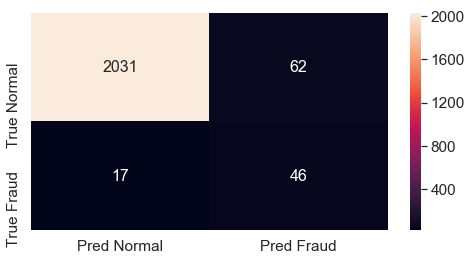

In [ ]:
# Cmembuat konfusion matriks
km_cm = confusion_matrix(y_test, km_y_pred)

# plorting hasil dari confusion matriks
plot_confusion_matrix(km_cm)

deengan menurunkan ambang seperti %93 untuk kasus yang ditandai sebagai penipuan, kita menandai lebih banyak kasus secara keseluruhan tetapi dengan demikian juga mendapatkan lebih banyak false positive

### menggunakan metode ``DB scan``

In [ ]:
y.shape

(7184,)

In [ ]:
pred_labels.shape

(7184,)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

db = DBSCAN(eps=.9, min_samples=10, n_jobs=-1).fit(X_scaled) 
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(y, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


jumlah cluster jauh lebih banyak dibandingkan dengan K-means. Untuk deteksi penipuan ini untuk saat ini OK

### menilai cluster terkecil

In [ ]:
pred_labels.shape

(7184,)

In [ ]:
# Hitung pengamatan di setiap nomor cluster
counts = np.bincount(pred_labels[pred_labels >= 0])
print(counts)

[3249  144 2714   55  173  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [ ]:
# urutkan jumlah sampel cluster dan ambil 3 cluster terkecil teratas
smallest_clusters = np.argsort(counts)[:3]
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 17  9]


In [ ]:
# cetak jumlah cluster terkecil saja
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[10 15 15]


jadi sekarang kita tahu kluster terkecil mana yang dapat Anda tandai sebagai penipuan. jika kita ingin mengambil lebih banyak kelompok terkecil, kita menyebarkan jaring kit lebih luas dan menangkap lebih banyak penipuan, tetapi kemungkinan besar juga lebih banyak false positive. terserah analis penipuan untuk menemukan jumlah kasus yang tepat untuk ditandai dan diselidiki

### cek hasil

In [ ]:
# buat kerangka data dari nomor cluster yang diprediksi dan label penipuan
df = pd.DataFrame({'clusternr':pred_labels,'fraud':y})

# Buat kondisi yang menandai penipuan untuk kluster terkecil
df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

print(pd.crosstab(df.fraud, df.predicted_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6968  16
1               176  24


bagaimana ini dibandingkan dengan model K-means? Hal baiknya adalah: dari semua kasus yang ditandai, kira-kira 2/3 sebenarnya adalah penipuan! Karena kira hanya mengambil tiga kelompok terkecil, menurut definisi kita menandai lebih sedikit kasus penipuan, jadi kita menangkap lebih sedikit tetapi juga memiliki lebih sedikit kesalahan positif. Namun, kita kehilangan cukup banyak kasus penipuan. Meningkatkan jumlah kluster terkecil yang kita tandai dapat meningkatkannya, tentu saja dengan mengorbankan lebih banyak false positive

## deteksi fraud berdasarkan teks

### pencarian kata dengan kerangka data

In [ ]:
df = pd.read_csv('enron_emails_clean.csv')
df.head()

Message-ID  \
0   <8345058.1075840404046.JavaMail.evans@thyme>   
1   <1512159.1075863666797.JavaMail.evans@thyme>   
2  <26118676.1075862176383.JavaMail.evans@thyme>   
3  <10369289.1075860831062.JavaMail.evans@thyme>   
4  <26728895.1075860815046.JavaMail.evans@thyme>   

                              From                               To  \
0  ('advdfeedback@investools.com')  ('advdfeedback@investools.com')   
1    ('richard.sanders@enron.com')    ('richard.sanders@enron.com')   
2            ('m..love@enron.com')            ('m..love@enron.com')   
3     ('leslie.milosevich@kp.org')     ('leslie.milosevich@kp.org')   
4     ('rtwait@graphicaljazz.com')     ('rtwait@graphicaljazz.com')   

                  Date                                            content  \
0  2002-01-29 23:20:55  INVESTools Advisory\nA Free Digest of Trusted ...   
1  2000-09-20 19:07:00  ----- Forwarded by Richard B Sanders/HOU/ECT o...   
2  2001-10-30 16:15:17  hey you are not wearing your target purple shi...   
3  2002-01-30 17:54:18  Leslie Milosevich\n1042 Santa Clara Avenue\nAl...   
4  2002-01-30 19:36:01  Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...   

                                       clean_content  
0  investools advisory free digest trusted invest...  
1  forwarded richard b sanders hou ect pm justin ...  
2  hey wearing target purple shirt today mine wan...  
3  leslie milosevich santa clara avenue alameda c...  
4  rini twait e th ave longmont co rtwait graphic...

In [ ]:
df.shape

(2090, 6)

In [ ]:
# Temukan semua email bersih yang berisi 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

In [ ]:
# Select the data from df using the mask
df.loc[mask]

Message-ID                        From  \
154  <6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                             To                 Date  \
154  ('sarah.palmer@enron.com')  2002-02-01 14:53:35   

                                               content  \
154  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...

### menggunakan daftar istilah

In [ ]:
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

filtered_emails = (df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)])
filtered_emails.shape

(314, 6)

dengan menggabungkan istilah pencarian dengan tanda 'or', yaitu `|`,kita dapat mencari banyak istilah dalam kumpulan data Anda dengan sangat mudah.

### buat flag

membuat flag dengan fungsi ``np.where()``

In [ ]:
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


### menghapus stopword

In [ ]:
from nltk.corpus import stopwords
import string

# stopword untuk dikecualikan
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

exclude = set(string.punctuation)

### Cleaning text data

In [ ]:
df = df[df.clean_content.notnull()]

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

def clean(text, stop):
    text = text.strip()
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    punc_free = ''.join(word for word in stop_free if word not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    return normalized

In [ ]:
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
print(text_clean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(text_clean)

2086

In [ ]:
text_clean[:1][0][:10]

['investools',
 'advisory',
 'free',
 'digest',
 'trusted',
 'investment',
 'advice',
 'unsubscribe',
 'free',
 'newsletter']

sekarang kita telah membersihkan data Anda sepenuhnya dengan langkah-langkah yang diperlukan, termasuk memecah teks menjadi kata-kata, menghapus stopwords dan tanda baca, dan lemmatisasi kata-kata Anda.

### buat dict dan corpus

In [ ]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(text_clean)

corpus = [dictionary.doc2bow(text) for text in text_clean]

print(dictionary)
print(corpus[:2])

Dictionary(33981 unique tokens: ['account', 'accurate', 'acquiring', 'acre', 'address']...)
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (7, 2), (8, 4), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 5), (15, 3), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 3), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 1), (57, 4), (58, 9), (59, 5), (60, 1), (61, 8), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 12), (82, 2), (83, 2), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 1), (98, 2), (99, 2), (100, 1), (101,

### menggunakan model LDA

latent Dirichlet Allocation (LDA) adalah model probabilistik generatif dari koleksi data diskrit seperti korpus teks. Ide dasarnya adalah bahwa dokumen direpresentasikan sebagai campuran acak atas topik laten (tidak terlihat).

LDA merupakan model Bayesian hirarki tiga tingkat, di mana setiap item koleksi dimodelkan sebagai campuran terbatas atas serangkaian set topik. Setiap topik dimodelkan sebagai campuran tak terbatas melalui set yang mendasari probabilitas topik. Dalam konteks pembuatan model teks, probabilitas topik memberikan representasi eksplisit dari sebuah dokumen

In [ ]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.054*"image" + 0.013*"se" + 0.013*"ne" + 0.013*"sp" + 0.012*"wscc"')
(1, '0.008*"e" + 0.007*"bakernet" + 0.007*"market" + 0.006*"mail" + 0.006*"service"')
(2, '0.044*"td" + 0.033*"net" + 0.030*"money" + 0.028*"tr" + 0.026*"width"')
(3, '0.046*"enron" + 0.013*"message" + 0.011*"original" + 0.011*"hou" + 0.010*"pm"')
(4, '0.021*"enron" + 0.010*"company" + 0.006*"energy" + 0.005*"stock" + 0.005*"employee"')


kita sekarang telah berhasil membuat model topik pertama kita pada data email Enron. Namun, cetakan kata-kata tidak benar-benar memberi kita informasi yang cukup untuk menemukan topik yang mungkin mengarahkan kita ke tanda-tanda penipuan. Oleh karena itu, kita harus memeriksa hasil model dengan cermat agar dapat mendeteksi apa pun yang dapat dikaitkan dengan penipuan dalam data kita

### menemukan penipu berdasarkan topik

In [ ]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topik dominan
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_details_df = topic_details_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score', 'Topic_Keywords']
    return topic_details_df

In [ ]:
# jalankan fungsi get_topic_details dan periksa hasilnya
print(get_topic_details(ldamodel, corpus))

      Dominant_Topic  % Score  \
0                4.0   0.9486   
1                3.0   0.3729   
2                3.0   0.8979   
3                4.0   0.9935   
4                4.0   0.9934   
5                4.0   0.9934   
6                4.0   0.6020   
7                4.0   0.9934   
8                3.0   0.8718   
9                4.0   0.9934   
10               4.0   0.9935   
11               4.0   0.9240   
12               4.0   0.9945   
13               4.0   0.9506   
14               4.0   0.9506   
15               4.0   0.9934   
16               4.0   0.7503   
17               3.0   0.5102   
18               1.0   0.5662   
19               4.0   0.8777   
20               4.0   0.9933   
21               4.0   0.9941   
22               4.0   0.9933   
23               4.0   0.9934   
24               4.0   0.9227   
25               4.0   0.8954   
26               4.0   0.9931   
27               4.0   0.9686   
28               4.0   0.5371   
29        

In [ ]:
# tambahkan teks asli ke detail topik dalam kerangka data
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.head()

Dominant_Topic  % Score                                     Topic_Keywords  \
0             4.0   0.9486  enron, company, energy, stock, employee, new, ...   
1             3.0   0.3729  enron, message, original, hou, pm, please, cor...   
2             3.0   0.8978  enron, message, original, hou, pm, please, cor...   
3             4.0   0.9935  enron, company, energy, stock, employee, new, ...   
4             4.0   0.9934  enron, company, energy, stock, employee, new, ...   

                                       Original text  
0  [investools, advisory, free, digest, trusted, ...  
1  [forwarded, richard, b, sander, hou, pm, justi...  
2  [hey, wearing, target, purple, shirt, today, m...  
3  [leslie, milosevich, santa, clara, avenue, ala...  
4  [rini, twait, e, th, ave, longmont, co, rtwait...

In [ ]:
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
print(topic_details.head())

   Dominant_Topic  % Score                                     Topic_Keywords  \
0             4.0   0.9486  enron, company, energy, stock, employee, new, ...   
1             3.0   0.3729  enron, message, original, hou, pm, please, cor...   
2             3.0   0.8978  enron, message, original, hou, pm, please, cor...   
3             4.0   0.9935  enron, company, energy, stock, employee, new, ...   
4             4.0   0.9934  enron, company, energy, stock, employee, new, ...   

                                       Original text  flag  
0  [investools, advisory, free, digest, trusted, ...     0  
1  [forwarded, richard, b, sander, hou, pm, justi...     1  
2  [hey, wearing, target, purple, shirt, today, m...     1  
3  [leslie, milosevich, santa, clara, avenue, ala...     0  
4  [rini, twait, e, th, ave, longmont, co, rtwait...     0  
